In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_vars = ['p1', 'p2', 'p3', 'p4', 'p5']
output_var = 'prod'

df = pd.read_csv('../data/tryptophan_production.csv', index_col=0)
df.rename({'dgfp_dt':'prod'}, axis=1, inplace=True)
print(df.shape)

(792, 7)


In [61]:
# Get only Name from Line Name
df['Name'] = df['Line Name'].apply(lambda x: x.split('-')[0])
df['Name'].nunique()

266

In [62]:
# Group by Line Name
replicate_mean = df.groupby('Name')['prod'].mean()

# Concat with original df
df = df.merge(replicate_mean, on='Name', suffixes=('', '_mean'))
df.rename({'prod_mean':'replicate_mean'}, axis=1, inplace=True)
df['Replicate_Error'] = df['prod'] - df['replicate_mean']

In [64]:
# Find rows with Replica_Error higher than 99% of all rows
df[df['Replicate_Error'].abs() >= df['Replicate_Error'].abs().quantile(0.99)]

,Line Name,prod,p1,p2,p3,p4,p5,Name,replicate_mean,Replicate_Error
337,SP224-r1,79.990664,6.0,12.0,13.0,20.0,28.0,SP224,123.932894,-43.942229
339,SP224-r3,174.085502,6.0,12.0,13.0,20.0,28.0,SP224,123.932894,50.152609
525,SP350-r1,278.266173,1.0,9.0,13.0,21.0,29.0,SP350,161.715406,116.550767
527,SP350-r3,51.049123,1.0,9.0,13.0,21.0,29.0,SP350,161.715406,-110.666283
528,SP354-r1,69.047804,4.0,8.0,13.0,20.0,27.0,SP354,120.296245,-51.248441
530,SP354-r3,171.159184,4.0,8.0,13.0,20.0,27.0,SP354,120.296245,50.862939
553,SP365-r2,227.141780,4.0,12.0,15.0,20.0,26.0,SP365,180.436352,46.705428
582,SP380-r1,193.137657,1.0,11.0,13.0,19.0,27.0,SP380,144.095323,49.042334


In [65]:
df = df[df['Replicate_Error'].abs() < df['Replicate_Error'].abs().quantile(0.99)]
df.shape

(784, 10)

In [71]:
lines_to_drop = ['SP224-r1', 'SP224-r2', 'SP224-r3', 'SP350-r1', 'SP350-r2', 'SP350-r3', 'SP354-r1', 'SP354-r2', 'SP354-r3', 'SP365-r1', 'SP365-r2', 'SP365-r3', 'SP380-r1', 'SP380-r2', 'SP380-r3']
len(lines_to_drop)

df = df[~df['Name'].isin(lines_to_drop)]


,Line Name,prod,p1,p2,p3,p4,p5,Name,replicate_mean,Replicate_Error
0,SP003-r1,99.225224,2.0,11.0,13.0,24.0,29.0,SP003,105.358720,-6.133497
1,SP003-r2,107.346770,2.0,11.0,13.0,24.0,29.0,SP003,105.358720,1.988050
2,SP003-r3,109.504167,2.0,11.0,13.0,24.0,29.0,SP003,105.358720,4.145447
3,SP004-r1,169.829824,2.0,11.0,13.0,19.0,25.0,SP004,159.715748,10.114076
4,SP004-r2,155.425955,2.0,11.0,13.0,19.0,25.0,SP004,159.715748,-4.289793
...,...,...,...,...,...,...,...,...,...,...
787,SP558-r2,133.932679,3.0,9.0,15.0,20.0,26.0,SP558,125.822843,8.109837
788,SP558-r3,130.438354,3.0,9.0,15.0,20.0,26.0,SP558,125.822843,4.615512
789,SP567-r1,115.555586,3.0,9.0,15.0,20.0,26.0,SP567,124.123246,-8.567660
790,SP567-r2,116.047262,3.0,9.0,15.0,20.0,26.0,SP567,124.123246,-8.075984


In [74]:
df.groupby('Name').mean()

/tmp/ipykernel_2705749/2581118883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Name').mean()


,prod,p1,p2,p3,p4,p5,replicate_mean,Replicate_Error
Name,,,,,,,,
SP003,105.358720,2.0,11.0,13.0,24.0,29.0,105.358720,4.736952e-15
SP004,159.715748,2.0,11.0,13.0,19.0,25.0,159.715748,9.473903e-15
SP008,112.879576,2.0,11.0,15.0,22.0,25.0,112.879576,-9.473903e-15
SP011,160.998056,1.0,9.0,13.0,22.0,25.0,160.998056,0.000000e+00
SP014,198.804384,5.0,9.0,13.0,22.0,25.0,198.804384,0.000000e+00
...,...,...,...,...,...,...,...,...
SP553,132.822132,3.0,9.0,15.0,20.0,26.0,132.822132,-4.736952e-15
SP554,64.431587,3.0,9.0,15.0,20.0,26.0,64.431587,1.184238e-14
SP556,83.009510,3.0,9.0,15.0,20.0,26.0,83.009510,-4.736952e-15


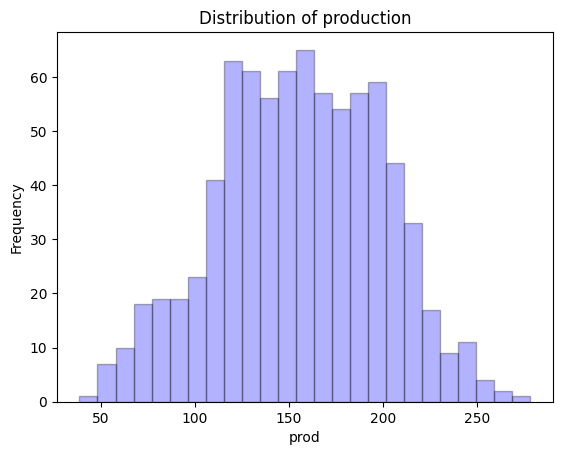

In [62]:
plt.hist(df['prod'], bins=25, color='blue', alpha=0.3, edgecolor='black')
plt.xlabel('prod')
plt.ylabel('Frequency')
plt.title('Distribution of production')
plt.show()

In [68]:
df[input_vars] = df[input_vars].astype(str)

In [80]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[input_vars] = df[input_vars].apply(le.fit_transform)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['p1', 'p2', 'p3', 'p4', 'p5']].values
y = df['prod'].values

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nomralize the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

from sklearn.metrics import mean_squared_error

print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

results

MSE: 397.20992526831355
RMSE: 19.93012607256446


,Actual,Predicted
0,99.679700,112.041113
1,69.047804,160.068636
2,133.122926,142.843585
3,103.336216,109.434329
4,114.531023,128.579976
...,...,...
154,121.442883,101.678039
155,173.029309,192.665849
156,150.325876,159.018116
157,184.261789,163.850926


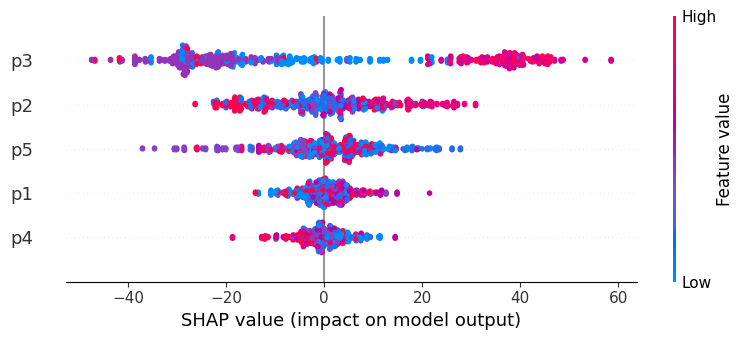

In [86]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, feature_names=['p1', 'p2', 'p3', 'p4', 'p5'])
